In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('salary_data_cleaning.csv')

In [65]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,max_salary,avg_salary,company_txt,job_state,age,python_yn,R_yn,spark,aws,excel
0,Jr. Data Scientist,68 k$-118 k$ (Esti. de Glassdoor),Description\n\nJob Description:\n\nWhy wake up...,3.7,Leidos\n3.7,"McLean, VA",10000+ Employees,1969,Company - Public,Aerospace & Defense,...,118,93.0,Leidos\n,VA,51,0,0,0,1,1
1,Data Scientist,94 k$-155 k$ (Esti. de Glassdoor),"When you’re the best, we’re the best. We insti...",4.0,"Vizient, Inc.\n4.0","Chicago, IL",1001 to 5000 Employees,1977,Company - Private,Health Care Services & Hospitals,...,155,124.5,"Vizient, Inc.\n",IL,43,1,0,0,0,0
2,"Scientist III, Pharma R & D",27 k$-85 k$ (Esti. de Glassdoor),The Scientist III develops and executes formul...,3.3,Amneal Pharmaceuticals\n3.3,"Piscataway, NJ",5001 to 10000 Employees,2002,Company - Public,Biotech & Pharmaceuticals,...,85,56.0,Amneal Pharmaceuticals\n,NJ,18,0,0,0,0,0
3,Scientist II,43 k$-96 k$ (Esti. de Glassdoor),"Job Description Summary\nBD Biosciences, the l...",3.8,BD\n3.8,"San Diego, CA",10000+ Employees,1897,Company - Public,Health Care Products Manufacturing,...,96,69.5,BD\n,CA,123,0,0,0,0,0
4,Senior Scientist I,64 k$-139 k$ (Esti. de Glassdoor),Job Description Summary\nThe successful candid...,3.8,BD\n3.8,"San Diego, CA",10000+ Employees,1897,Company - Public,Health Care Products Manufacturing,...,139,101.5,BD\n,CA,123,0,0,0,0,0


In [66]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [67]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    
    ##job title and seniority
    
    ## Fix state Los angeles
    
    ## Job description length
    
    ## competitor count
    
    ## hourly wage to annual
    
    # remove new line from job title

In [69]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [70]:
df.job_simp.value_counts()

data scientist    322
analyst           123
na                 89
data engineer      76
manager            26
mle                18
director            3
Name: job_simp, dtype: int64

In [73]:
df['seniority'] = df['Job Title'].apply(seniority)

In [74]:
df.seniority.value_counts()

na        533
senior    123
jr          1
Name: seniority, dtype: int64

In [71]:
# Fix state Los Angeles
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    133
VA     74
MA     57
TX     43
NY     32
MD     31
FL     30
NJ     25
IL     23
DC     16
WI     16
PA     15
UT     15
MO     14
OH     13
WA     13
GA     12
CO     12
NC     11
NM      7
NE      7
MI      6
TN      5
CT      5
RI      5
MN      4
AL      4
DE      4
AZ      4
KY      3
ID      3
OR      3
IA      2
MS      2
IN      2
AK      2
KS      2
SC      1
OK      1
Name: job_state, dtype: int64

In [106]:
# Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       5046
1       2464
2       4438
3       3623
4       4645
5       3496
6       5378
7       3244
8       6145
9       3345
10      2535
11      2736
12      3576
13      4108
14      2893
15      5911
16      5339
17      4587
18      3689
19      4397
20      3899
21      4301
22      2255
23      6102
24      2416
25      3822
26      5746
27      4213
28      1499
29      4167
30      4467
31      4816
32      4000
33      4539
34      5894
35      4246
36      2969
37      5622
38      3640
39      6213
40      4480
41      7234
42      3555
43      8621
44      5196
45      2302
46      2748
47      2633
48      4181
49      3109
50      2999
51      3595
52      2035
53      3246
54      2739
55      2902
56      4767
57      4959
58      4642
59      1806
60      4823
61      4791
62      4110
63      3832
64      4600
65      4522
66      5162
67      2822
68      1744
69      2546
70      4481
71      1972
72      5279
73      2191
74      3405
75      3197
76      5279

In [49]:
#hourly wage to annual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis=1)

In [47]:
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis=1)

In [50]:
df[df.hourly ==1][['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
8,1,34.0,46.0
295,1,30.0,46.0
296,1,28.0,40.0
301,1,34.0,60.0
318,1,30.0,46.0
319,1,28.0,40.0
324,1,34.0,60.0
338,1,34.0,60.0
346,1,160.0,276.0
351,1,122.0,230.0


In [51]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [53]:
df['company_txt']

0                      Leidos
1               Vizient, Inc.
2      Amneal Pharmaceuticals
3                          BD
4                          BD
                ...          
652      Albertsons Companies
653               Safeway Inc
654     FingerPaint Marketing
655       UCSF Medical Center
656          BWX Technologies
Name: company_txt, Length: 657, dtype: object

In [54]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,age,python_yn,R_yn,spark,aws,excel,desc_len
count,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000
mean,3.786301,1849.286149,0.016743,0.001522,73.412481,124.677321,98.461948,41.581431,0.642314,0.006088,0.193303,0.298326,0.526636,4184.624049
std,0.499873,485.485080,0.128404,0.039014,25.790526,38.527856,31.733325,43.665020,0.479684,0.077849,0.395189,0.457872,0.499670,1637.183690
min,2.200000,0.000000,0.000000,0.000000,13.000000,40.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000
25%,3.500000,1947.000000,0.000000,0.000000,56.000000,99.000000,77.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3014.000000
50%,3.800000,1991.000000,0.000000,0.000000,73.000000,123.000000,97.500000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3958.000000
75%,4.100000,2004.000000,0.000000,0.000000,89.000000,146.000000,117.500000,55.000000,1.000000,0.000000,0.000000,1.000000,1.000000,5054.000000
max,5.000000,2019.000000,1.000000,1.000000,160.000000,276.000000,201.000000,352.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12627.000000


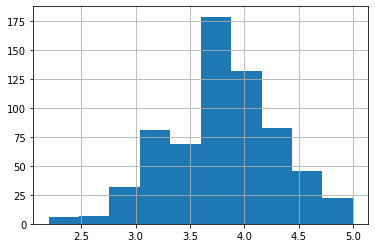

In [55]:
df.Rating.hist()

In [57]:
df[['age', 'avg_salary', 'Rating', 'desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,-0.069185,0.008111,0.135087
avg_salary,-0.069185,1.000000,0.156441,-0.030427
Rating,0.008111,0.156441,1.000000,-0.040013
desc_len,0.135087,-0.030427,-0.040013,1.000000


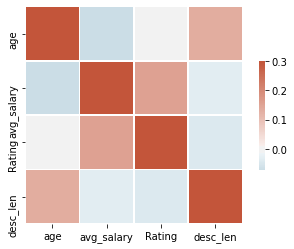

In [60]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df[['age', 'avg_salary', 'Rating', 'desc_len']].corr(), vmax=.3, center=0,cmap=cmap, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [75]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp',
       'seniority'],
      dtype='object')

In [83]:
df_cat = df[['Location', 'Size', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'company_txt','python_yn', 'R_yn', 'spark', 'aws', 'excel','seniority', 'job_simp','job_state'
       ]]

graph for Location: total = 220


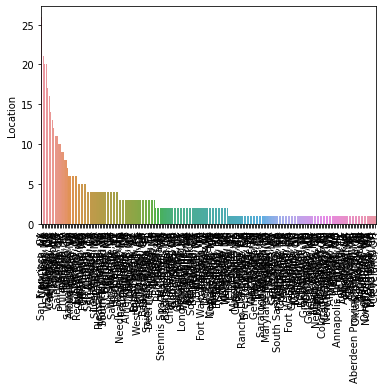

graph for Size: total = 8


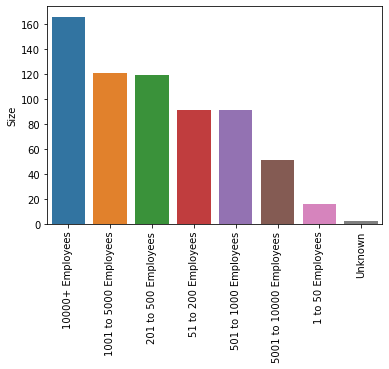

graph for Type of ownership: total = 10


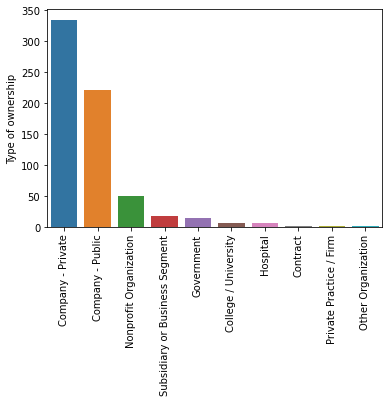

graph for Industry: total = 68


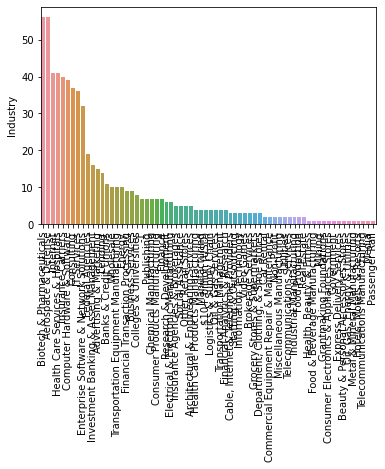

graph for Sector: total = 35


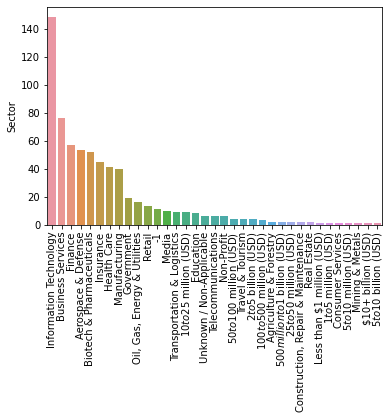

graph for Revenue: total = 14


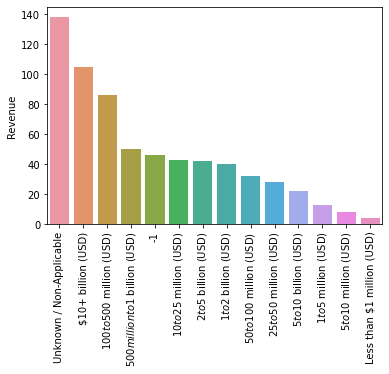

graph for company_txt: total = 385


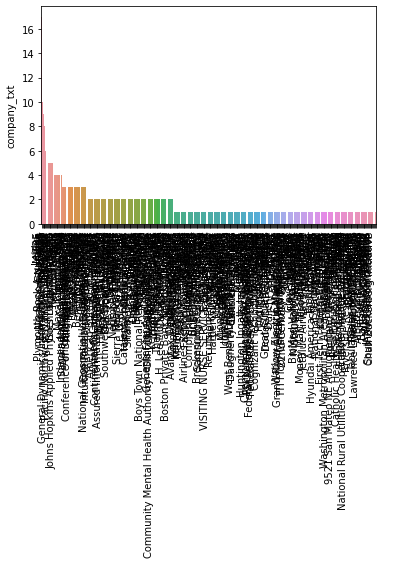

graph for python_yn: total = 2


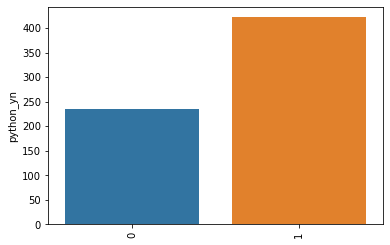

graph for R_yn: total = 2


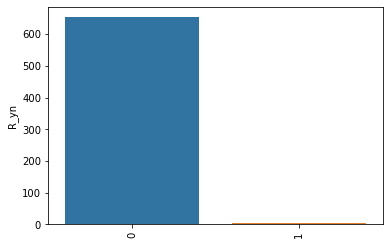

graph for spark: total = 2


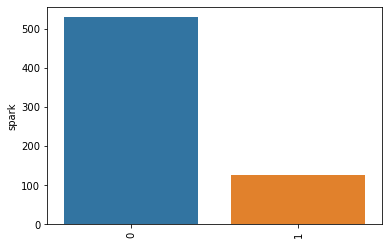

graph for aws: total = 2


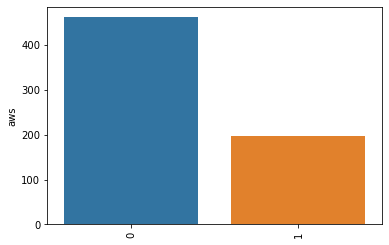

graph for excel: total = 2


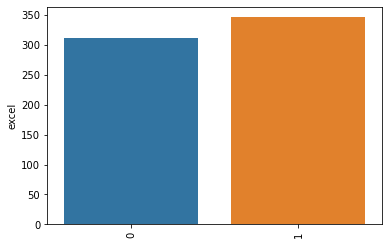

graph for seniority: total = 3


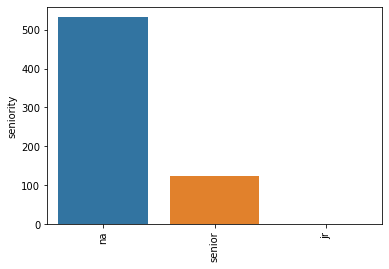

graph for job_simp: total = 7


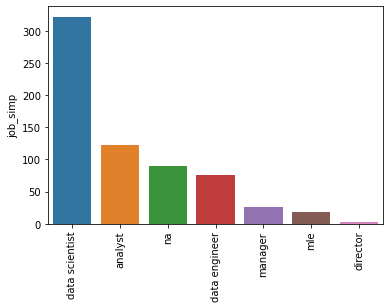

graph for job_state: total = 39


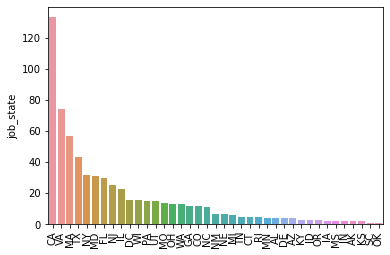

In [89]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d"%(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


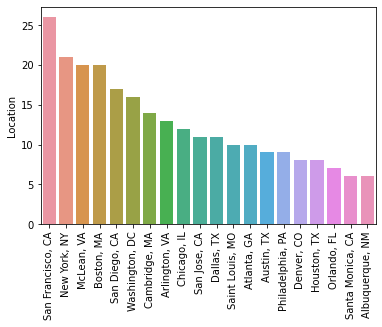

graph for company_txt: total = 20


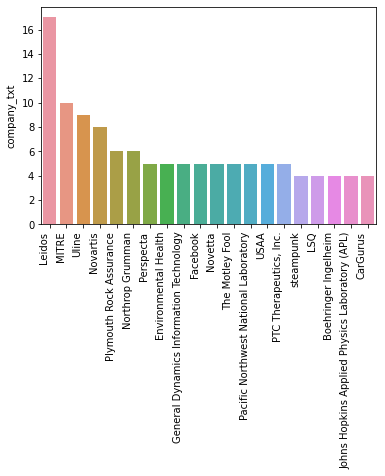

In [90]:
for i in df_cat[['Location', 'company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d"%(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [91]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp',
       'seniority'],
      dtype='object')

In [92]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,72.540650
data engineer,104.585526
data scientist,110.740683
director,118.333333
manager,95.596154
mle,116.138889
na,81.224719


In [93]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        na          67.189655
               senior      85.472222
data engineer  na         100.041667
               senior     121.625000
data scientist jr          93.000000
               na         107.923488
               senior     130.975000
director       na         123.000000
               senior     109.000000
manager        na          84.552632
               senior     125.571429
mle            na         111.764706
               senior     190.500000
na             na          73.425373
               senior     104.977273

In [98]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        na               42.500000
          manager          50.214286
          data scientist  104.500000
          data engineer    86.500000
          analyst          60.250000
...                              ...
AZ        data scientist  116.000000
          data engineer   101.333333
AL        na               91.000000
          analyst          54.000000
AK        na              115.000000

[125 rows x 1 columns]

In [99]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [102]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        na                       1
          manager                  7
          data scientist           1
          data engineer            1
          analyst                  6
WA        na                       2
          data scientist           8
          data engineer            1
          analyst                  2
VA        data scientist          42
          data engineer           18
          analyst                  9
          mle                      2
          na                       3
UT        data scientist          10
          data engineer            1
          analyst                  4
TX        na                       3
          mle                      1
          manager                  1
          data scientist          23
          data engineer            7
          analyst                  8
TN        data scientist           5
SC        analyst                  1
RI        analyst                  5
PA        data scientist           5
          data engineer            2
          analyst                  5
          manager                  2
          na                       1
OR        data scientist           1
          data engineer            2
OK        analyst                  1
OH        na                       3
          mle                      2
          data engineer            1
          data scientist           7
NY        na                       2
          mle                      1
          manager                  1
          data scientist          20
          data engineer            3
          analyst                  5
NM        analyst                  2
          manager                  2
          na                       3
NJ        na                       6
          mle                      1
          manager                  4
          director                 1
          data scientist           8
          data engineer            2
          analyst                  3
NE        na                       3
          analyst                  4
NC        na                       3
          data scientist           4
          analyst                  4
MS        analyst                  2
MO        data scientist           9
          na                       1
          data engineer            2
          analyst                  2
MN        data scientist           2
          data engineer            1
          analyst                  1
MI        na                       1
          data scientist           2
          data engineer            1
          analyst                  2
MD        na                       8
          data scientist          20
          data engineer            1
          analyst                  2
MA        director                 1
          data scientist          30
          analyst                  8
          data engineer            3
          mle                      1
          na                      14
KY        na                       1
          data scientist           2
KS        data scientist           2
IN        data engineer            1
          analyst                  1
IL        analyst                  8
          na                       1
          mle                      3
          manager                  3
          data scientist           4
          data engineer            4
ID        data engineer            1
          analyst                  1
          data scientist           1
IA        analyst                  2
GA        data scientist          10
          data engineer            2
FL        na                       6
          data scientist           9
          data engineer            1
          analyst                 14
DE        na                       2
          manager                  2
DC        analyst                  1
          data scientist           9
          data engineer       

In [103]:
# rating, industry, sector, revenue, hourly, employer provided, python, r, spark, aws, excel, desc_len, type of ownership, avg_salary 

In [109]:
df_pivots =  df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'desc_len', 'Type of ownership', 'avg_salary']]

In [113]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
4.6     122.181818
4.7     111.687500
5.0     110.750000
4.1     110.447368
3.8     109.062500
4.0     104.333333
2.2     103.000000
2.6     102.500000
4.3     101.766667
3.6     101.745455
4.4     101.328125
4.5     100.759259
3.2     100.574074
4.8     100.363636
4.9      99.444444
3.7      98.243421
3.4      96.888889
3.0      96.600000
3.9      93.163265
4.2      92.444444
3.5      91.833333
3.3      88.131579
2.7      81.666667
2.8      80.500000
3.1      80.062500
2.4      78.500000
2.9      72.937500
2.3      70.500000
2.5      52.000000
Industry
                                           avg_salary
Industry                                             
Other Retail Stores                        155.600000
Transportation Equipment Manufacturing     130.700000
Food & Beverage Manufacturing              123.000000
Media                                      122.000000
Internet                                   120.743902
Express Delivery 

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [115]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16,24
$1 to $5 million (USD),5,8
$10 to $25 million (USD),21,22
$10+ billion (USD),30,75
$100 to $500 million (USD),18,68
$2 to $5 billion (USD),14,28
$25 to $50 million (USD),10,18
$5 to $10 billion (USD),6,16
$5 to $10 million (USD),3,5


In [123]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
>>> nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

word_filtered = punctuation_stop(words)

text = " ".join([ele for ele in word_filtered])

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words = 2000, width = 800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()